# Word2Vec model
***

To work with word embeddings you can usepretrained vectors.

Pretrain model was downloaded from (you can google "GoogleNews-vectors-negative300"):

https://code.google.com/archive/p/word2vec/

Word's cluster example:

https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

In [3]:
# !pip install gensim

In [1]:
import gensim

In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(
    "/Users/soa/gensim-data/GoogleNews-vectors-negative300.bin", binary=True
)

In [3]:
# get the shape of embedding matrix
model.vectors.shape

(3000000, 300)

In [5]:
# get vocab
# list(model.vocab)[:20] < v4.0.0
list(model.key_to_index)[:20]

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are']

In [6]:
model["thanks"]

array([-9.27734375e-02,  8.10546875e-02, -1.00097656e-01,  2.07031250e-01,
        1.72119141e-02, -1.02050781e-01,  1.18164062e-01, -1.92382812e-01,
       -2.53906250e-02,  1.17187500e-01, -2.42919922e-02, -4.73022461e-03,
       -1.48437500e-01,  2.28271484e-02,  1.08398438e-01,  4.45556641e-03,
        4.57031250e-01,  1.66015625e-01,  1.37695312e-01,  1.33789062e-01,
        1.38671875e-01,  1.82617188e-01,  2.45117188e-01, -1.77734375e-01,
        1.90429688e-01, -1.50390625e-01, -6.10351562e-03,  6.83593750e-02,
       -5.09643555e-03,  4.78515625e-02,  4.73632812e-02, -1.62109375e-01,
       -1.33789062e-01,  2.63671875e-01,  1.17187500e-01,  1.90734863e-03,
       -1.90429688e-02, -8.30078125e-02,  1.15234375e-01,  2.07031250e-01,
        2.46093750e-01,  2.91748047e-02, -8.48388672e-03,  2.45117188e-01,
        3.35937500e-01, -1.73828125e-01, -7.47070312e-02, -2.79541016e-02,
        1.78710938e-01, -4.39453125e-02,  6.46972656e-03, -1.60156250e-01,
        1.68945312e-01,  

In [7]:
similar_words = model.most_similar("thanks")
print(similar_words)

[('Thanks', 0.7244948744773865), ('THANKS', 0.4840734004974365), ('courtesy', 0.4766530692577362), ('thank', 0.4723905920982361), ('benefitted', 0.4631054103374481), ('kudos', 0.45405685901641846), ('despite', 0.45255333185195923), ('congrats', 0.4482288658618927), ('benefited', 0.44743144512176514), ('grateful', 0.4350835680961609)]


In [8]:
similarity_two_words = model.similarity("please", "see")
print(similarity_two_words)

0.24447691


In [52]:
keys = [
    "Paris",
    "Python",
    "Sunday",
    "Tolstoy",
    "Twitter",
    "food",
    "iOS",
]

In [53]:
len(keys)

7

Let us select a few words from the vocabulary of the pre-trained Google News model and prepare word vectors for visualization.

In [54]:
embeddings = []
words = []
clusters = []

for word in keys:
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
        clusters.append(word)

In [55]:
import numpy

In [56]:
embeddings = numpy.array(embeddings)

In [63]:
# words

TSNE representation

In [57]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(perplexity=15, n_components=2,n_iter=3500, random_state=32)
embeddings = tsne.fit_transform(embeddings)

In [59]:
import plotly.express as px

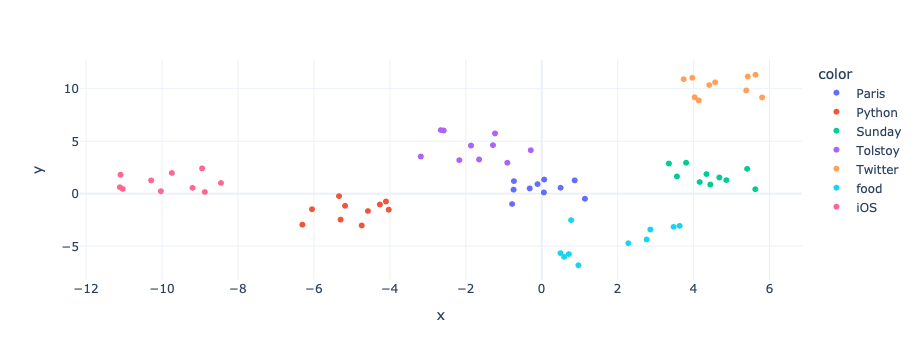

In [60]:
fig = px.scatter(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    color=clusters,
    template="plotly_white",
)
fig.update_traces(textposition="top center")
fig.show()

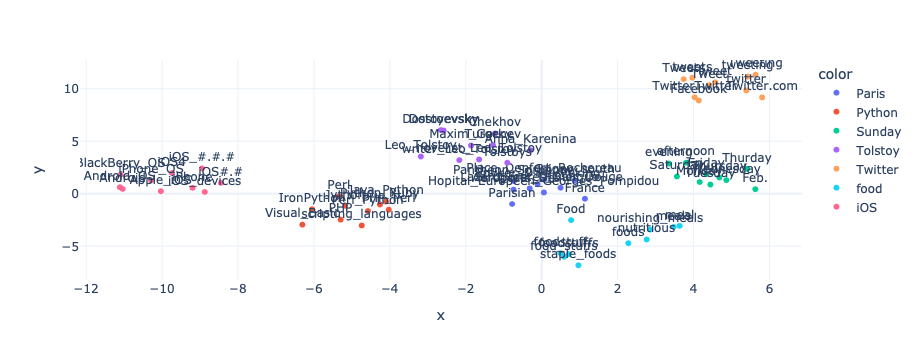

In [61]:
fig = px.scatter(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    color=clusters,
    template="plotly_white",
    text=words
)
fig.update_traces(textposition="top center")
fig.show()